In [15]:
import numpy as np
import matplotlib
import pandas as pd
import sklearn

In [16]:
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

In [17]:
X_R1, y_R1 = make_regression(n_samples = 1000, n_features=1,
                             n_informative=1, bias = 150.0,
                             noise = 30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

In [18]:
def plot_regression_curves_given_k():
    fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
    X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

    for thisaxis, K in zip(subaxes, [1, 3]):
        knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
        y_predict_output = knnreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                     label='Predicted', alpha=0.8)
        thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('KNN regression (K={})'.format(K))
        thisaxis.legend()
    plt.tight_layout()

def plot_regression_model_complexity():
    fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
    X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                       random_state = 0)

    for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
        knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
        y_predict_output = knnreg.predict(X_predict_input)
        train_score = knnreg.score(X_train, y_train)
        test_score = knnreg.score(X_test, y_test)
        thisaxis.plot(X_predict_input, y_predict_output)
        thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
        thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('KNN Regression (K={})\n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                          .format(K, train_score, test_score))
        thisaxis.legend()
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [19]:
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

R-squared test score: 0.851


<IPython.core.display.Javascript object>


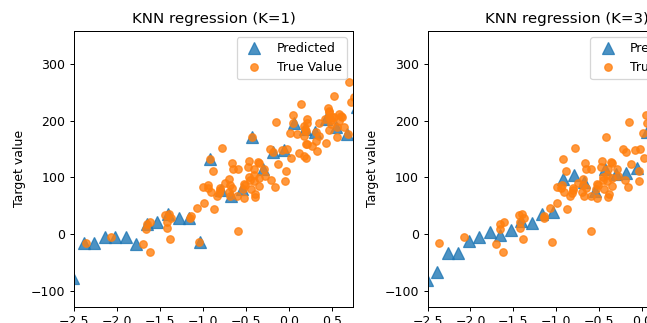

In [20]:
plot_regression_curves_given_k()

<IPython.core.display.Javascript object>


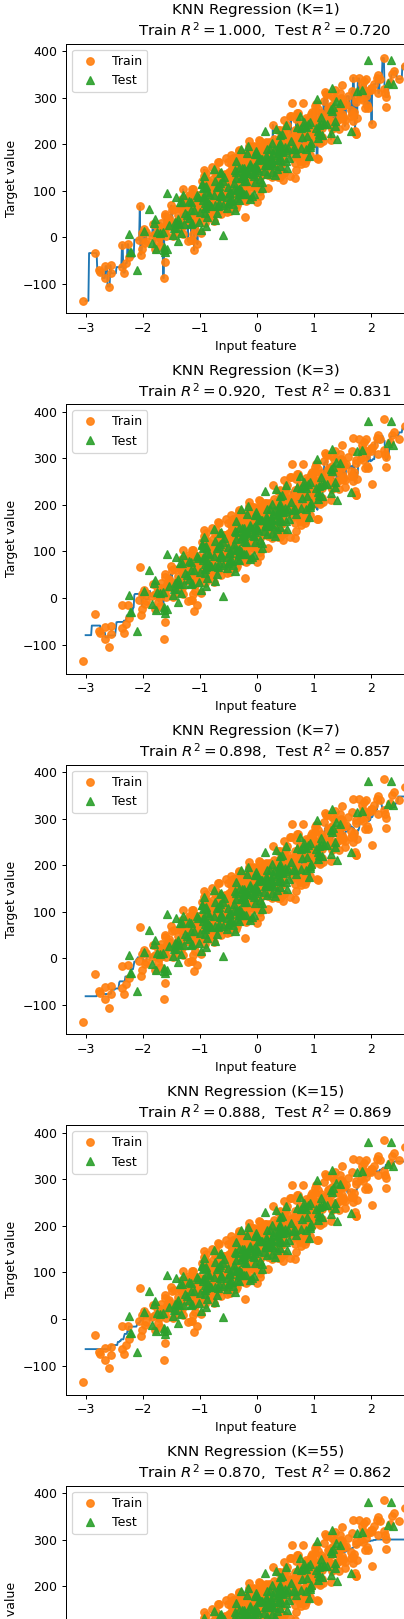

In [21]:
plot_regression_model_complexity()